# Author: Sruti Keerti Munukutla

## Using sentiment analysis of Amazon Furniture reviews to recommend products

In [1]:
import nltk
import pandas as pd
import numpy as np
import csv
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer



nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/skeerti2/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/skeerti2/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /Users/skeerti2/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /Users/skeerti2/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /Users/skeerti2/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloadi

[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Downloading package nombank.1.0 to
[nltk_data]    |     /Users/skeerti2/nltk_data...
[nltk_data]    |   Package nombank.1.0 is already up-to-date!
[nltk_data]    | Downloading package nonbreaking_prefixes to
[nltk_data]    |     /Users/skeerti2/nltk_data...
[nltk_data]    |   Package nonbreaking_prefixes is already up-to-date!
[nltk_data]    | Downloading package nps_chat to
[nltk_data]    |     /Users/skeerti2/nltk_data...
[nltk_data]    |   Package nps_chat is already up-to-date!
[nltk_data]    | Downloading package omw to
[nltk_data]    |     /Users/skeerti2/nltk_data...
[nltk_data]    |   Package omw is already up-to-date!
[nltk_data]    | Downloading package omw-1.4 to
[nltk_data]    |     /Users/skeerti2/nltk_data...
[nltk_data]    |   Package omw-1.4 is already up-to-date!
[nltk_data]    | Downloading package opinion_lexicon to
[nltk_data]    |     /Users/skeerti2/nltk_data...
[nltk_data]    |   Package opi

[nltk_data]    |   Package word2vec_sample is already up-to-date!
[nltk_data]    | Downloading package wordnet to
[nltk_data]    |     /Users/skeerti2/nltk_data...
[nltk_data]    |   Package wordnet is already up-to-date!
[nltk_data]    | Downloading package wordnet2021 to
[nltk_data]    |     /Users/skeerti2/nltk_data...
[nltk_data]    |   Package wordnet2021 is already up-to-date!
[nltk_data]    | Downloading package wordnet2022 to
[nltk_data]    |     /Users/skeerti2/nltk_data...
[nltk_data]    |   Package wordnet2022 is already up-to-date!
[nltk_data]    | Downloading package wordnet31 to
[nltk_data]    |     /Users/skeerti2/nltk_data...
[nltk_data]    |   Package wordnet31 is already up-to-date!
[nltk_data]    | Downloading package wordnet_ic to
[nltk_data]    |     /Users/skeerti2/nltk_data...
[nltk_data]    |   Package wordnet_ic is already up-to-date!
[nltk_data]    | Downloading package words to
[nltk_data]    |     /Users/skeerti2/nltk_data...
[nltk_data]    |   Package words

True

In [2]:
df = pd.read_csv('amazon_reviews_us_Furniture_v1_00.tsv',sep='\t', header=0, error_bad_lines=False)
df.head()


/var/folders/7t/ngfzpdfd4q39hxvplh70gj380000gn/T/ipykernel_71330/456950349.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('amazon_reviews_us_Furniture_v1_00.tsv',sep='\t', header=0, error_bad_lines=False)
Skipping line 2645: expected 15 fields, saw 22
Skipping line 10770: expected 15 fields, saw 22
Skipping line 13472: expected 15 fields, saw 22
Skipping line 15785: expected 15 fields, saw 22
Skipping line 22792: expected 15 fields, saw 22
Skipping line 26618: expected 15 fields, saw 22

Skipping line 70872: expected 15 fields, saw 22
Skipping line 71165: expected 15 fields, saw 22
Skipping line 118103: expected 15 fields, saw 22

Skipping line 148666: expected 15 fields, saw 22
Skipping line 150834: expected 15 fields, saw 22
Skipping line 169344: expected 15 fields, saw 22

Skipping line 197223: expected 15 fields, saw 22
Skipping line 212607: expected 15 fields, saw 2

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,24509695,R3VR960AHLFKDV,B004HB5E0E,488241329,Shoal Creek Computer Desk,Furniture,4,0,0,N,Y,... desk is very study and it i has a beautifu...,This desk is very study and it i has a beauti...,2015-08-31
1,US,34731776,R16LGVMFKIUT0G,B0042TNMMS,205864445,Dorel Home Products Delaney Large Rectangular ...,Furniture,5,0,0,N,Y,Five Stars,Great item,2015-08-31
2,US,1272331,R1AIMEEPYHMOE4,B0030MPBZ4,124663823,Bathroom Vanity Table Jewelry Makeup Desk Benc...,Furniture,5,1,1,N,Y,Five Stars,"Perfect fit for my bedroom, been wanting one s...",2015-08-31
3,US,45284262,R1892CCSZWZ9SR,B005G02ESA,382367578,Sleep Master Ultima Comfort Memory Foam 6 Inch...,Furniture,3,0,0,N,Y,Good enough,"We use this on a trundle bed. So, it does not...",2015-08-31
4,US,30003523,R285P679YWVKD1,B005JS8AUA,309497463,"1 1/4"" GashGuards: Deluxe Rubberized Plastic B...",Furniture,3,0,0,N,N,Gash Gards for daybed,The product is fine...just seemed like it took...,2015-08-31


In [3]:
df.shape

(791673, 15)

In [4]:
# remove rows where review_body does not contain any text
df = df[df['review_body'].notna()]
df.shape

(791570, 15)

In [5]:
df['review_ground_truth'] = np.where(df['star_rating'] > 2, '1', '0')

In [6]:
df = df[:10000]

In [7]:
df.shape

(10000, 16)

In [8]:
from nltk.metrics.distance import *
import re

In [9]:
from nltk.tokenize import RegexpTokenizer

def preprocess_text(text):
    if type(text) != str:
        print(str(text))
        print("line skipped")
        return
    
    #tokens = word_tokenize(text.lower())
    
    # tokenize and remove punctuations
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(text.lower())
    
    # Remove stop words
    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]
    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    # Join the tokens back into a string
    processed_text = ' '.join(lemmatized_tokens)
    return processed_text

In [10]:
df['processed_reviews'] = df['review_body'].apply(preprocess_text)

In [ ]:
df['processed_reviews']

In [ ]:
# from sklearn.model_selection import train_test_split
# train, test = train_test_split(df, test_size=0.25)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

count_vector = CountVectorizer()
x = count_vector.fit_transform(df['processed_reviews'])
print(type(x))

In [ ]:
df['x_vector'] = x.toarray().tolist()
print(df['x_vector'])
print(df['x_vector'].shape)

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.25)

x_train = train['x_vector']
y_train = train['review_ground_truth']
#print(x_train)

x_test = test['x_vector']
y_test = test['review_ground_truth']

In [ ]:
# convert np array of list objects to 2D numpy matrix
np_x_train = np.array(list(x_train.to_numpy()))
np_x_test = np.array(list(x_test.to_numpy()))
print(np_x_train.shape, np_x_test.shape)

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(max_iter = 200)

In [ ]:
model = log_model.fit(np_x_train, y_train)
score = log_model.score(np_x_test, y_test)
score

### Decision Tree

In [ ]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(np_x_train, y_train)

y_pred = clf.predict(np_x_test)
print(y_pred.shape)
print(y_test.shape)

In [20]:
def get_accuracy(y_pred, y_test):
    count = 0
    i = 0
    for y in y_test:
        if y_pred[i] == y:
            count += 1
        i+=1
    print(count/len(y_test) * 100)

In [ ]:
get_accuracy(y_pred, y_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

### Support Vector Machine

In [11]:
from sklearn import svm
clf = svm.SVC()
clf.fit(np_x_train, y_train)

NameError: name 'np_x_train' is not defined

In [ ]:
y_pred_svc = clf.predict(np_x_test)

In [ ]:
get_accuracy(y_pred_svc, y_test)

In [ ]:
print(classification_report(y_test, y_pred_svc))

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred_svc, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

## Iterations

## TF-IDF Vectorizer

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Create feature vectors
vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(df['processed_reviews'])


In [ ]:
df['x_vector_tfidf'] = x.toarray().tolist()
print(df['x_vector_tfidf'])
print(df['x_vector_tfidf'].shape)

In [ ]:
train_svm, test_svm = train_test_split(df, test_size=0.25)

x_train = train_svm['x_vector_tfidf']
y_train = train_svm['review_ground_truth']
#print(x_train)

x_test = test_svm['x_vector_tfidf']
y_test = test_svm['review_ground_truth']

In [ ]:
np_x_train = np.array(list(x_train.to_numpy()))
np_x_test = np.array(list(x_test.to_numpy()))
print(np_x_train.shape, np_x_test.shape)

In [ ]:
clf = svm.SVC()
clf.fit(np_x_train, y_train)
y_pred_svc_tfidf = clf.predict(np_x_test)
get_accuracy(y_pred_svc_tfidf, y_test)

In [ ]:
print(classification_report(y_test, y_pred_svc_tfidf))

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred_svc_tfidf, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

### Bi-grams

In [13]:
vectorizer = TfidfVectorizer(ngram_range=(2,2))
x = vectorizer.fit_transform(df['processed_reviews'])

In [14]:
x.shape

(10000, 119206)

In [15]:
df['x_vector_tfidf'] = x.toarray().tolist()
print(df['x_vector_tfidf'])
print(df['x_vector_tfidf'].shape)

0        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
2        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
3        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
                               ...                        
10000    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
10001    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
10002    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
10003    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
10004    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Name: x_vector_tfidf, Length: 10000, dtype: object
(10000,)


In [17]:
from sklearn.model_selection import train_test_split
train_svm, test_svm = train_test_split(df, test_size=0.25)

x_train = train_svm['x_vector_tfidf']
y_train = train_svm['review_ground_truth']
#print(x_train)

x_test = test_svm['x_vector_tfidf']
y_test = test_svm['review_ground_truth']

In [18]:
np_x_train = np.array(list(x_train.to_numpy()))
np_x_test = np.array(list(x_test.to_numpy()))
print(np_x_train.shape, np_x_test.shape)

(7500, 119206) (2500, 119206)


In [19]:
clf = svm.SVC()
clf.fit(np_x_train, y_train)
y_pred_svc_tfidf = clf.predict(np_x_test)


NameError: name 'get_accuracy' is not defined

In [21]:
get_accuracy(y_pred_svc_tfidf, y_test)

86.04


In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_svc_tfidf))

              precision    recall  f1-score   support

           0       0.80      0.01      0.02       352
           1       0.86      1.00      0.92      2148

    accuracy                           0.86      2500
   macro avg       0.83      0.51      0.47      2500
weighted avg       0.85      0.86      0.80      2500



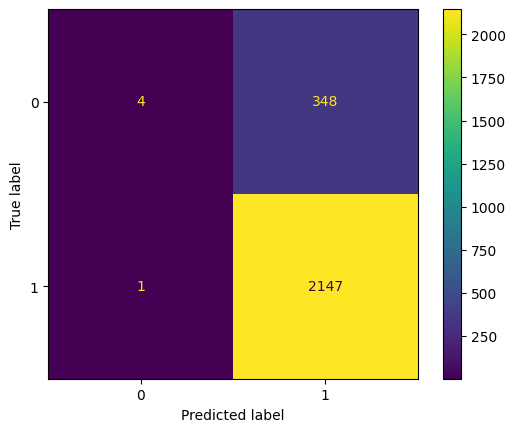

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred_svc_tfidf, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()